In [1]:
import pandas as pd
import requests 
import time
import re
from bs4 import BeautifulSoup 
from tqdm import tqdm
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:
# url = 'https://en.wikipedia.org/wiki/Lionel_Messi' 
# url='https://en.wikipedia.org/wiki/Barack_Obama'
url='https://en.wikipedia.org/wiki/Michael_Jackson'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser') 

In [3]:
list = []
for i in soup.select('p'):
    list.append(i.getText())
#     print(i.getText())
print(list)

['\n', '\n', 'Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer. Dubbed the "King of Pop", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music. Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name. His sound and style have influenced artists of various genres. Jackson\'s contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades.\n', 'The eighth child of the Jackson family, Jackson made his professional debut in 1964 with his elder brothers Jackie, Tito, Jermaine, and Marlon as a member of the Jackson 5. Jackson began his solo career in 1971 while at Motown Records, and rose to solo stardom with his fifth studio album Off the Wall (1979) during the peak of disco. By the early 

In [4]:
sentences = []
for i in list:
    l = i.split('.')
    for j in l:
        sentences.append(j)
sentences

['\n',
 '\n',
 'Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer',
 ' Dubbed the "King of Pop", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music',
 ' Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name',
 ' His sound and style have influenced artists of various genres',
 " Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades",
 '\n',
 'The eighth child of the Jackson family, Jackson made his professional debut in 1964 with his elder brothers Jackie, Tito, Jermaine, and Marlon as a member of the Jackson 5',
 ' Jackson began his solo career in 1971 while at Motown Records, and rose to solo stardom with his fifth studio album Off the Wall (1979) during the pe

In [5]:
filtered_sentences=[]
for sentence in sentences:
    count = 0
    for words in sentence:
        if(words==" "):
            count = count+1
    if(count>=3):
        filtered_sentences.append(sentence)
filtered_sentences

['Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer',
 ' Dubbed the "King of Pop", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music',
 ' Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name',
 ' His sound and style have influenced artists of various genres',
 " Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades",
 'The eighth child of the Jackson family, Jackson made his professional debut in 1964 with his elder brothers Jackie, Tito, Jermaine, and Marlon as a member of the Jackson 5',
 ' Jackson began his solo career in 1971 while at Motown Records, and rose to solo stardom with his fifth studio album Off the Wall (1979) during the peak of disco',
 ' By t

In [6]:
sentences=filtered_sentences

In [7]:
for val in range(len(sentences)):
    sentences[val]=re.sub("\[(.*?)\]","",sentences[val])
    print(sentences[val])

Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer
 Dubbed the "King of Pop", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music
 Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name
 His sound and style have influenced artists of various genres
 Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades
The eighth child of the Jackson family, Jackson made his professional debut in 1964 with his elder brothers Jackie, Tito, Jermaine, and Marlon as a member of the Jackson 5
 Jackson began his solo career in 1971 while at Motown Records, and rose to solo stardom with his fifth studio album Off the Wall (1979) during the peak of disco
 By the early 1980s, Jackson became

In [8]:
sentences[-1]

' In 2019, Forbes recognized Jackson as the top-earning dead celebrity each year since his death except 2012'

In [9]:
df=pd.DataFrame(sentences)
df.head()

,0
0,"Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer"
1,"Dubbed the ""King of Pop"", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music"
2,"Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name"
3,His sound and style have influenced artists of various genres
4,"Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades"


In [10]:
df['sentence']=df[0]
df=df.drop([0],axis=1)

In [11]:
df

,sentence
0,"Michael Joseph Jackson (August 29, 1958 – June 25, 2009) was an American singer, songwriter, and dancer"
1,"Dubbed the ""King of Pop"", he is regarded as one of the most significant cultural figures of the 20th century and one of the greatest entertainers in the history of music"
2,"Through stage and video performances, he popularized complicated dance techniques such as the moonwalk, to which he gave the name"
3,His sound and style have influenced artists of various genres
4,"Jackson's contributions to music, dance, and fashion, along with his publicized personal life, made him a global figure in popular culture for over four decades"
...,...
668,"A trial was held from February 6 to 24, 2017, and a decision was expected in 2019"
669,"In 2016, Forbes estimated annual gross earnings by the Jackson Estate at $825 million, the largest ever recorded for a celebrity, mostly due to the sale of the Sony/ATV catalog"
670,In 2018 the figure was $400 million
671,"It was the eighth year since his death that Jackson's annual earnings were reported to be over $100 million, thus bringing Jackson's postmortem total to $2"


In [12]:
candidate_sentences=df

In [13]:
candidate_sentences['sentence'].sample(5)

102                                                                         But at the request of Motown founder Berry Gordy, he performed in exchange for an opportunity to do a solo performance
407                                                                   In 2008, Fortress Investments threatened to foreclose on Neverland Ranch, which Jackson had used as collateral for his loans
43                                                                                            In an interview with Oprah Winfrey in 1993, Jackson said that his youth had been lonely and isolated
617     The video for "Leave Me Alone" was not officially released in the US, but in 1989 was nominated for three Billboard Music Video Awards and won a Golden Lion Award for its special effects
382                 In April 2006, Jackson agreed to use a piece of his ATV catalog stake, then worth about $1 billion, as collateral against his $270 million worth of loans from Bank of America
Name: sentence, dtype: ob

In [14]:
def get_entities(sent):
 
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    
  prv_tok_text = ""   

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
 

  return [ent1.strip(), ent2.strip()]

In [15]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 673/673 [00:05<00:00, 126.32it/s]


In [16]:
entity_pairs


[['Michael Joseph Jackson', ''],
 ['he', 'greatest  music'],
 ['such dance he', 'name'],
 ['sound', 'various  genres'],
 ['personal  him', 'four  decades'],
 ['eighth Jackson Jackson', 'elder  Jackson'],
 ['Jackson', 'fifth studio disco'],
 ['early  Jackson', 'popular  music'],
 ['music videos', 'racial art form'],
 ['popularity', 'prominent 1980s pop culture'],
 ['26th Grammy Thriller', 'eight Grammy Year'],
 ['Jackson', '1991 Dance Mix'],
 ['music', 'racial  prejudice'],
 ['late  Jackson', 'changing  appearance'],
 ['he', 'sexually family friend'],
 ['Jackson', 'court'],
 ['he', 'sexual abuse allegations'],
 ['Jackson', 'personal  physician'],
 ['memorial  service', 'grief'],
 ['Murray', 'involuntary  February'],
 ['Leaving which', 'sexual media Jackson'],
 ['Jackson', '350 million 350 records'],
 ['1991 Book I', 'best  time'],
 ['Thriller', '66 million 66 copies'],
 ['Dance HIStory', 'selling remix time'],
 ['Bad', 'number one number singles'],
 ['Jackson', 'different Billboard deca

In [17]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1
  if(k>0):
    span = doc[matches[k][1]:matches[k][2]] 
    return(span.text)
  

In [18]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 673/673 [00:04<00:00, 143.17it/s]


In [19]:
pd.Series(relations).value_counts()[:50]

performed at         5
released on          4
returned to          4
Classical            3
Get Enough           2
Give                 2
honored as           2
debuted at           2
moved to             2
referred to          2
team for             2
released in          2
Be                   2
aired on             2
climbed to           2
accused of           2
emphasized racial    2
million of           2
settled out          2
Is                   2
dancer with          2
died from            2
honored with         2
led to               2
nominated for        1
premiered on         1
admitted to          1
stayed               1
sang from            1
sold in less         1
rendition of         1
stand at             1
certified for        1
inducted onto        1
became               1
relocated from       1
seen on              1
settled with         1
acquitted on         1
partnered with       1
special              1
inducted to          1
rehearsed in         1
closed as  

In [20]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})


In [21]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

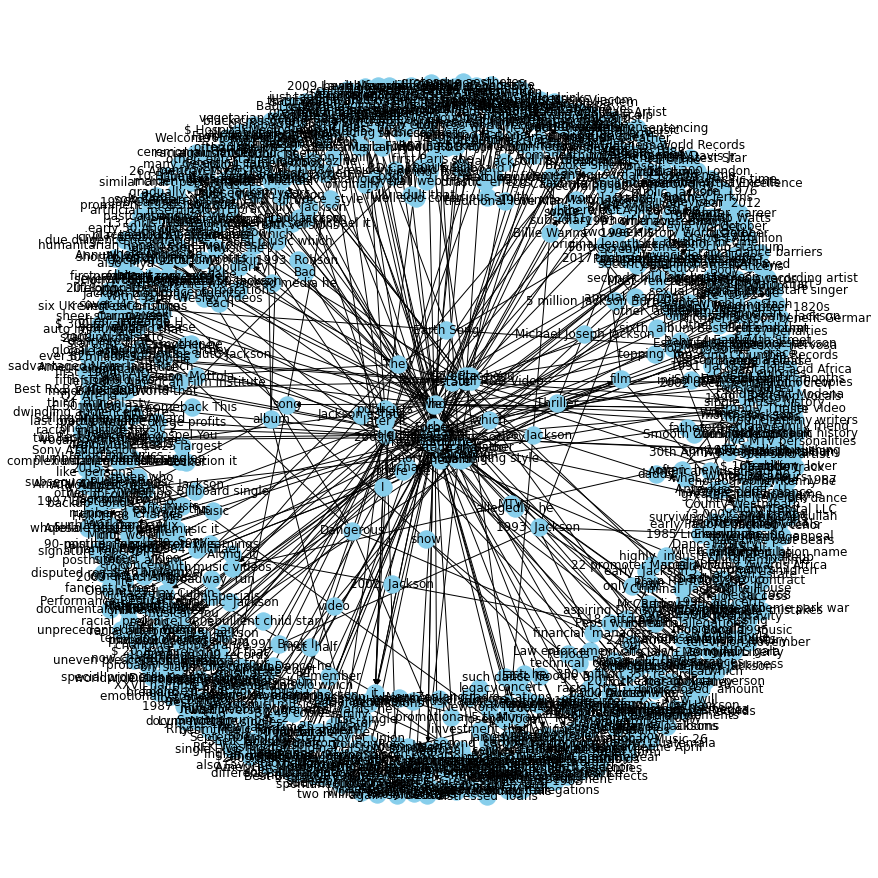

In [22]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

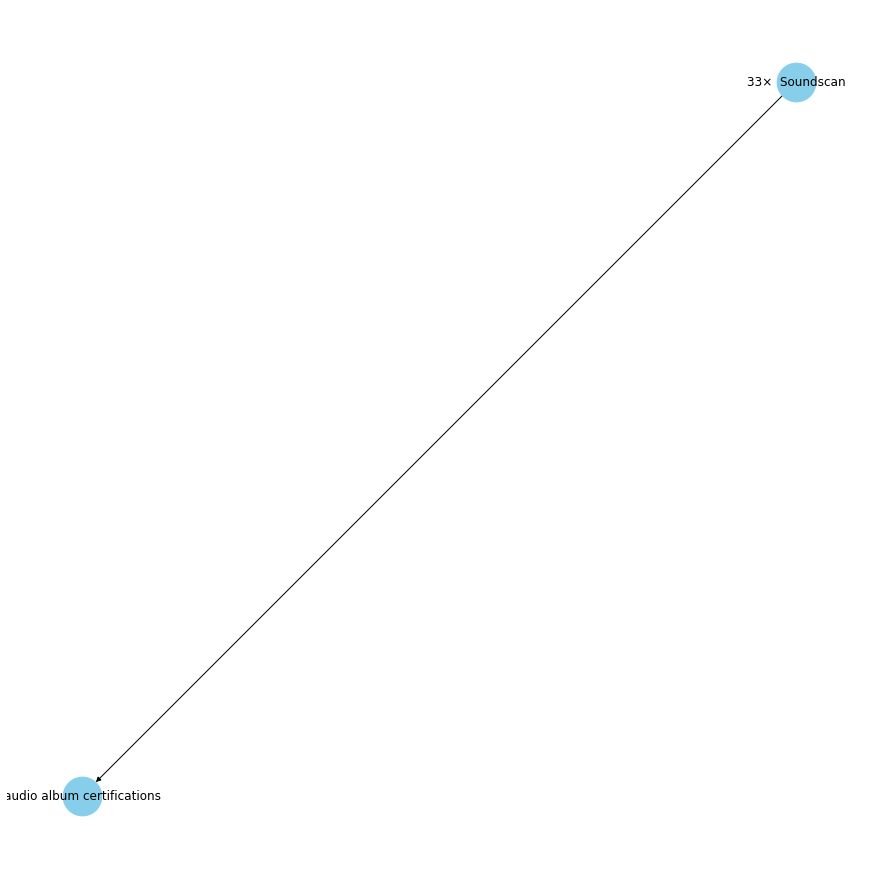

In [23]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="certified at"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

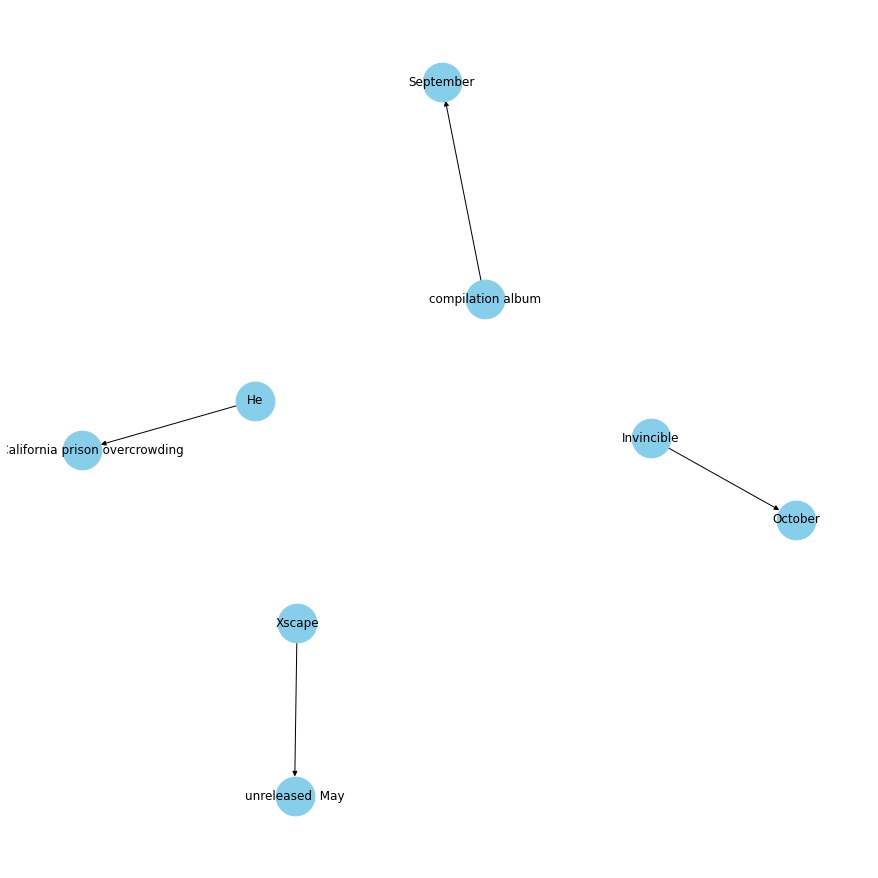

In [24]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released on"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()